In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [79]:
df = pd.read_csv('/content/drive/My Drive/Datathon/Data/mydata.csv')
df = pd.get_dummies(df, columns = ['categories'])
df = df.drop(df.columns[[0]], axis=1)

print(df.shape)
df.head()

(1319, 57)


,Name of Project,Implementing Agency,Recipient Institution,Approved year,Completed Project,Project Duration,Amount of Funding Approved (USD millions),Least Developed Country,Small Island Developing Nation,Fragile or Conflict Affected State,...,categories_Capacity development,"categories_Detection, Observation, Monitoring, Analysis & Forecasting of Hazards",categories_Disaster Preparedness and Response,categories_Disaster risk knowledge and management,categories_Governance,categories_Monitoring and Evaluation of climate services,categories_Observation System,categories_Provision and application of climate services,categories_User Interface,categories_Warning Dissemination and Communication
0,(fp124) strengthening climate resilience of su...,International Union for Conservation of Nature...,Ministry of Environment,2020,1,6,39.78,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,adapting afghan communities to climate-induced...,UNDP,"NEPA, MRRD, MAIL, ANDMA, Afghan Met Office, Mo...",2015,0,0,5.60,1,0,1,...,0,0,0,1,0,0,0,0,0,0
2,bangladesh: first biennial update report (bur1...,UNDP,Ministry of Environment and Forests/Department...,2018,0,0,0.35,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,building climate resilient livelihoods in vuln...,FAO,Department of Environment,2019,0,0,8.93,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,south-south cooperation grant (readiness grant),NABARD,0,2018,0,0,0.05,1,0,1,...,0,0,0,0,1,0,0,0,0,0


In [74]:
#for i,v in enumerate(df.columns):
  #print(i,v)
categories = df.iloc[:, 48:58]
#print(categories.columns)
categories = pd.DataFrame(data=categories.sum(axis=0), columns=['Count'])
categories = categories.sort_values('Count', ascending=False).T
categories = categories.rename(columns={"categories_Capacity development": "Capacity Development",
                           "categories_Detection, Observation, Monitoring, Analysis & Forecasting of Hazards": "Detection, Observation, Monitoring, Analysis & Forecasting of Hazards",
                           "categories_Disaster Preparedness and Response": "Disaster Preparedness and Response",
                           "categories_Disaster risk knowledge and management": "Disaster Risk Knowledge and Management",
                           "categories_Governance": "Governance",
                           "categories_Monitoring and Evaluation of climate services": "Monitoring and Evaluation of Climate Services",
                           "categories_Observation System": "Observation System",
                           "categories_Provision and application of climate services": "Provision and Application of Climate Services",
                           "categories_User Interface": "User Interface",
                           "categories_Warning Dissemination and Communication ": "Warning Dissemination and Communication"
                          })
categories

,Governance,Provision and Application of Climate Services,Capacity Development,Warning Dissemination and Communication,"Detection, Observation, Monitoring, Analysis & Forecasting of Hazards",Disaster Risk Knowledge and Management,User Interface,Observation System,Disaster Preparedness and Response,Monitoring and Evaluation of Climate Services
Count,422,221,188,156,122,103,42,25,20,20


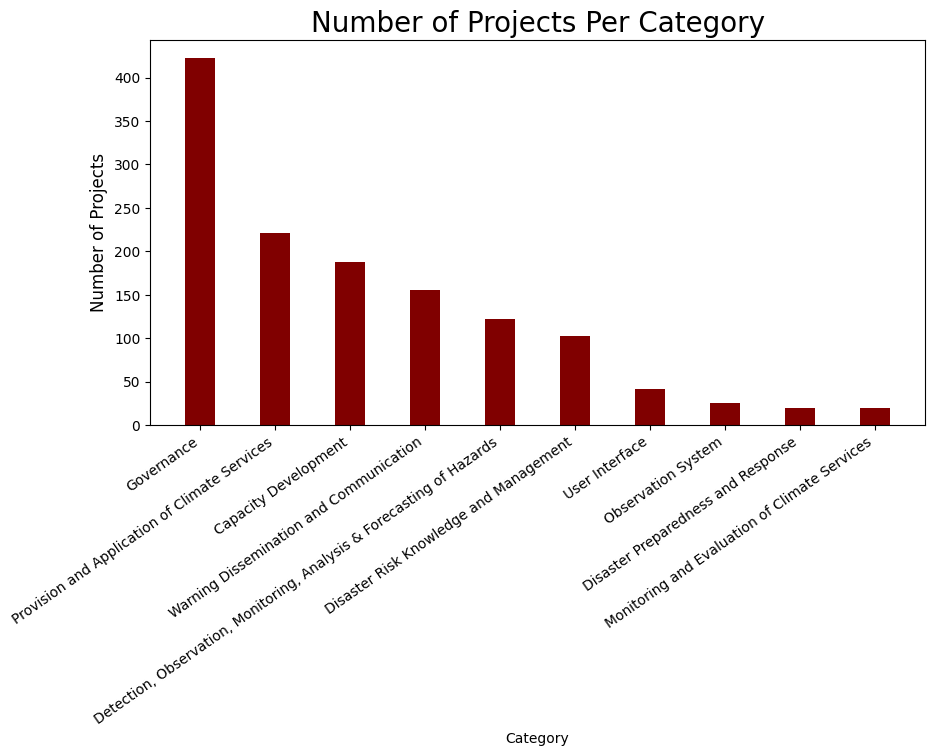

In [105]:
y = []
#print(categories.iloc[0])
for i in categories.columns:
  y.append(categories[i].iloc[0])

fig = plt.figure(figsize = (10,5))
plt.bar(categories.columns, y, color='maroon', width = 0.4)
plt.xlabel("Category")
plt.ylabel("Number of Projects", fontsize = 12)
plt.xticks(ha = 'right', rotation=35, fontsize = 10)
plt.title("Number of Projects Per Category", fontsize = 20)
plt.show()

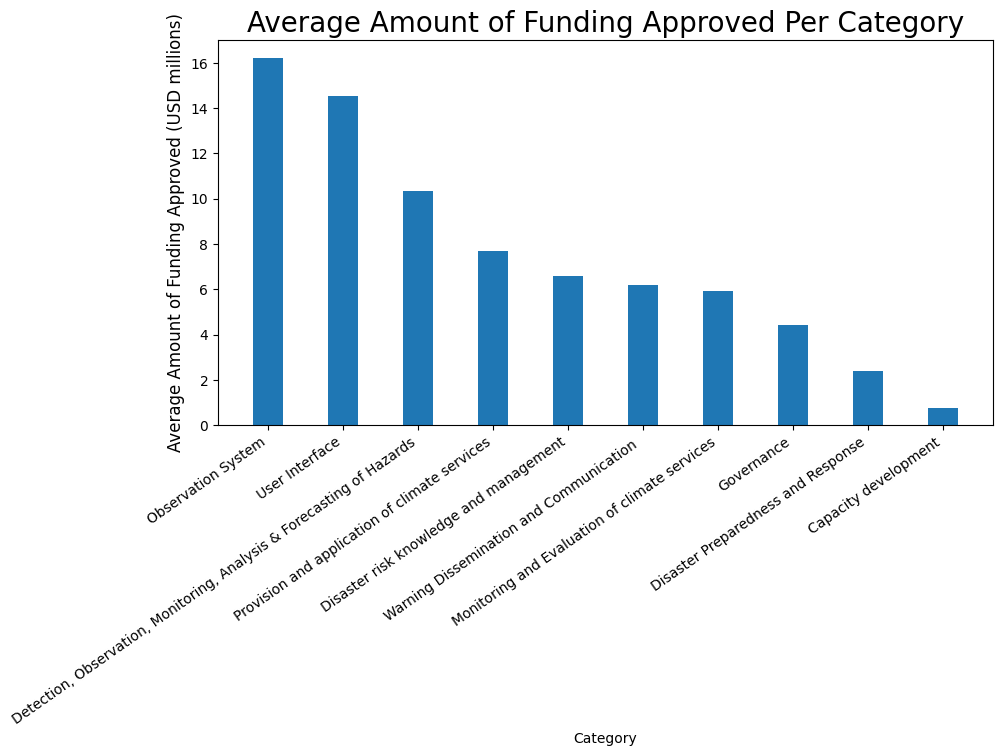

In [104]:
df = pd.read_csv('/content/drive/My Drive/Datathon/Data/mydata.csv')
df = df.drop(df.columns[[0]], axis=1)
funding = df.groupby('categories').mean()["Amount of Funding Approved (USD millions)"].reset_index()
funding = funding.set_index(funding.columns[0])
funding = funding.sort_values('Amount of Funding Approved (USD millions)', ascending=False).T
funding

y = []
for i in funding.columns:
  y.append(funding[i].iloc[0])


fig = plt.figure(figsize = (10,5))
plt.bar(funding.columns, y, width = 0.4)
plt.xlabel("Category")
plt.ylabel("Average Amount of Funding Approved (USD millions)",fontsize=12)
plt.xticks(ha = 'right', rotation=35, fontsize=10)
plt.title("Average Amount of Funding Approved Per Category",fontsize=20)
plt.show()

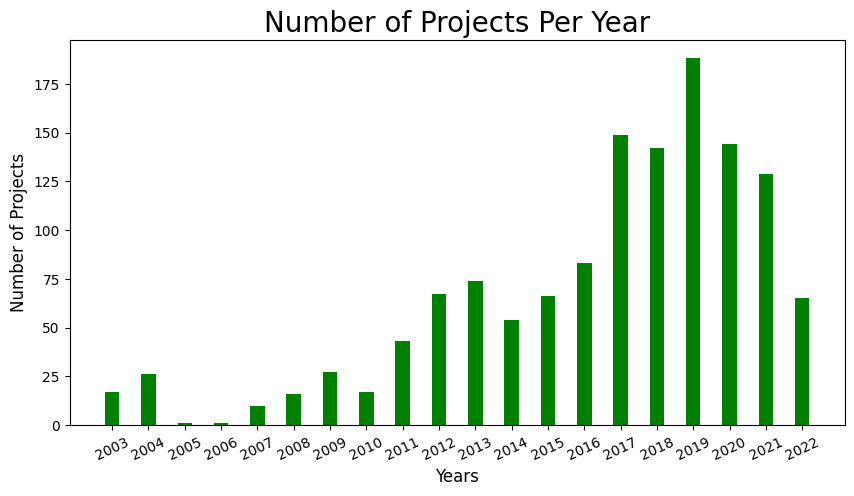

In [113]:
years = df.groupby('Approved year').count()["Amount of Funding Approved (USD millions)"].reset_index()
years = years.set_index(years.columns[0])
years = years.sort_values('Amount of Funding Approved (USD millions)', ascending=False).T
years

y = []
for i in years.columns:
  y.append(years[i].iloc[0])

fig = plt.figure(figsize = (10,5))
plt.bar(years.columns, y, color='green',width = 0.4)
plt.xlabel("Years", fontsize = 12)
plt.ylabel("Number of Projects", fontsize=12)
plt.xticks(np.arange(2003,2023),ha = 'center', fontsize=10, rotation=25)
plt.title("Number of Projects Per Year", fontsize=20)
plt.show()

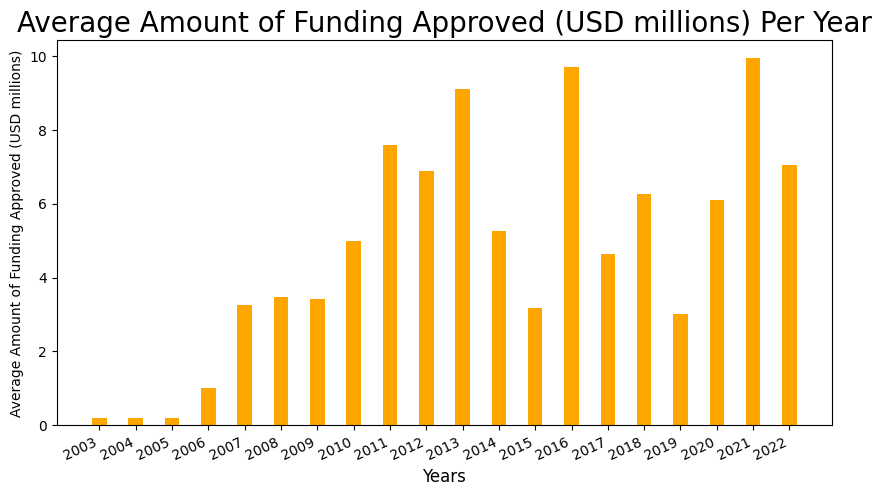

In [114]:
years_f = df.groupby('Approved year').mean()["Amount of Funding Approved (USD millions)"].reset_index()
years_f = years_f.set_index(years_f.columns[0])
years_f = years_f.sort_values('Amount of Funding Approved (USD millions)', ascending=False).T
years_f

y = []
for i in years_f.columns:
  y.append(years_f[i].iloc[0])

fig = plt.figure(figsize = (10,5))
plt.bar(years_f.columns, y, color='orange',width = 0.4)
plt.xlabel("Years", fontsize=12)
plt.ylabel("Average Amount of Funding Approved (USD millions)")
plt.xticks(np.arange(2003,2023),ha = 'right', rotation=25, fontsize = 10)
plt.title("Average Amount of Funding Approved (USD millions) Per Year", fontsize=20)
plt.show()